In [117]:
import re, json
import pandas as pd
import numpy as np
import geonamescache as gnc
from unidecode import unidecode

In [131]:
gc = gnc.GeonamesCache()
city_data_file = "./data/headline_cities_and_countries.json"
city_location_file = './data/processed_headlines_locations.csv'

import pandas as pd

def load_city_data(filename):
    city_data = pd.read_json(filename)
    city_data = city_data.replace({None: np.nan})
    
    return city_data

city_data = load_city_data(city_data_file)
city_data.describe()

,headline,country,city,accent_city
count,650,15,608,608
unique,648,10,558,558
top,Spanish Flu Spreading through Madrid,Brazil,San,San
freq,2,3,13,13


In [123]:
def get_locations(data):
    location_data = []
    for city in city_data['accent_city']:
        matches = gc.get_cities_by_name(city)
        if matches:
            matches = sorted([{k: v for k, v in list(match.values())[0].items()} for match in matches],
                             key=lambda x: x["population"], reverse=True)
            location_data.append({
                "name": matches[0]["name"],
                "latitude": matches[0]["latitude"],
                "longitude": matches[0]["longitude"],
                "countrycode": matches[0]["countrycode"],
                "pop": matches[0]["population"],
            })
            
    location_data = pd.DataFrame(location_data)
    location_data = location_data.drop_duplicates()
    return location_data

location_data = get_city_locations(data)
location_data.tail()

,name,latitude,longitude,countrycode,pop
603,Jerusalem,31.76904,35.21633,IL,801000
604,Indang,14.19528,120.87694,PH,41159
605,Suva,-18.14161,178.44149,FJ,77366
606,Bella Vista,18.45539,-69.94540,DO,175683
607,Wichita,37.69224,-97.33754,US,389965


In [127]:
def merge(city_data, location_data):
    city_locations = pd.merge(
        city_data, location_data, left_on="accent_city", right_on="name", how="left"
    )
    return city_locations

city_locations = merge(city_data, location_data)
city_locations.tail()

,headline,country,city,accent_city,name,latitude,longitude,countrycode,pop
645,Rumors about Rabies spreading in Jerusalem have been refuted,NaN,Jerusalem,Jerusalem,Jerusalem,31.76904,35.21633,IL,801000.0
646,More Zika patients reported in Indang,NaN,Indang,Indang,Indang,14.19528,120.87694,PH,41159.0
647,Suva authorities confirmed the spread of Rotavirus,NaN,Suva,Suva,Suva,-18.14161,178.44149,FJ,77366.0
648,More Zika patients reported in Bella Vista,NaN,Bella Vista,Bella Vista,Bella Vista,18.45539,-69.94540,DO,175683.0
649,Zika Outbreak in Wichita Falls,NaN,Wichita,Wichita,Wichita,37.69224,-97.33754,US,389965.0


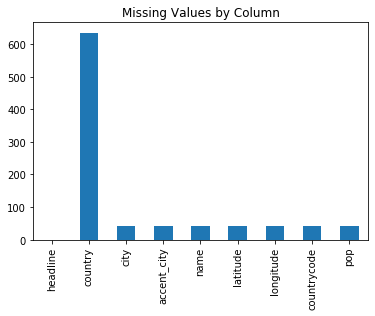

In [134]:
data = city_locations
_ = data.isna().sum().plot.bar(title='Missing Values by Column')

In [135]:
pd.options.display.max_colwidth = 100

no_name = data[data["name"].isna()].copy()

print(f"There are {len(no_name)} headlines without a city.")

no_name.tail()

There are 42 headlines without a city.


,headline,country,city,accent_city,name,latitude,longitude,countrycode,pop
599,Zika arrives in Dangriga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,More Patients in Maynard are Getting Diagnosed with Syphilis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628,Zika case reported in Antioquia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,Chikungunya has not Left Pismo Beach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,Zika spreads to La Joya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
def data_clean(data):
    data = data.drop(columns=['country'])
    data = data.dropna(subset=['name'])
    data = data.drop(columns=['name'])
    
    return data

def save_data(data, filename=city_location_file):
    data.to_csv(filename)
    return

data = data_clean(city_locations)
save_data(data)

We have the city locations for 608 cities.


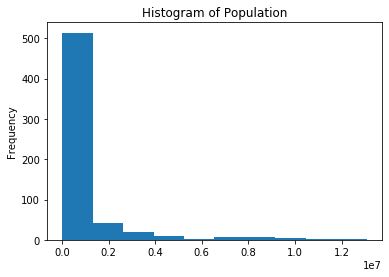

In [136]:
print(f'We have the city locations for {len(new_data)} cities.')
_ = new_data['pop'].plot.hist(title='Histogram of Population')

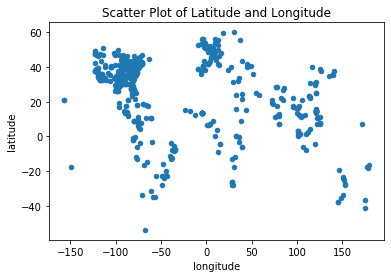

In [137]:
_ = new_data.plot.scatter(
    x="longitude", y="latitude", title="Scatter Plot of Latitude and Longitude"
)